In [2]:
import numpy as np
import pandas as pd
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

## Single Example

In [5]:
N = 20
M = 50
sigma = 0.1                 # Corresponding to 20dB

H_real = np.random.normal(0, 1, size=(N, M))
H_imag = np.random.normal(0, 1, size=(N, M))

# Combine real and imaginary parts of H
H = H_real + 1j * H_imag

# Generate a single sparse x (complex-valued)
x_true_real = np.zeros(M)
x_true_imag = np.zeros(M)
non_zero_indices = np.random.choice(M, size=M // 10, replace=False)
x_true_real[non_zero_indices] = np.random.normal(0, 1, size=M // 10)
x_true_imag[non_zero_indices] = np.random.normal(0, 1, size=M // 10)
x_true = x_true_real + 1j * x_true_imag

# Generate observed Y with Gaussian noise (complex-valued)
noise_real = np.random.normal(0, sigma, N)
noise_imag = np.random.normal(0, sigma, N)
noise = noise_real + 1j * noise_imag
Y = H @ x_true + noise

# Decompose H and Y into real and imaginary parts for Stan
stan_data = {
    "N": N,
    "M": M,
    "Y_real": np.real(Y),
    "Y_imag": np.imag(Y),
    "H_real": H_real,
    "H_imag": H_imag,
    "sigma": sigma,
}


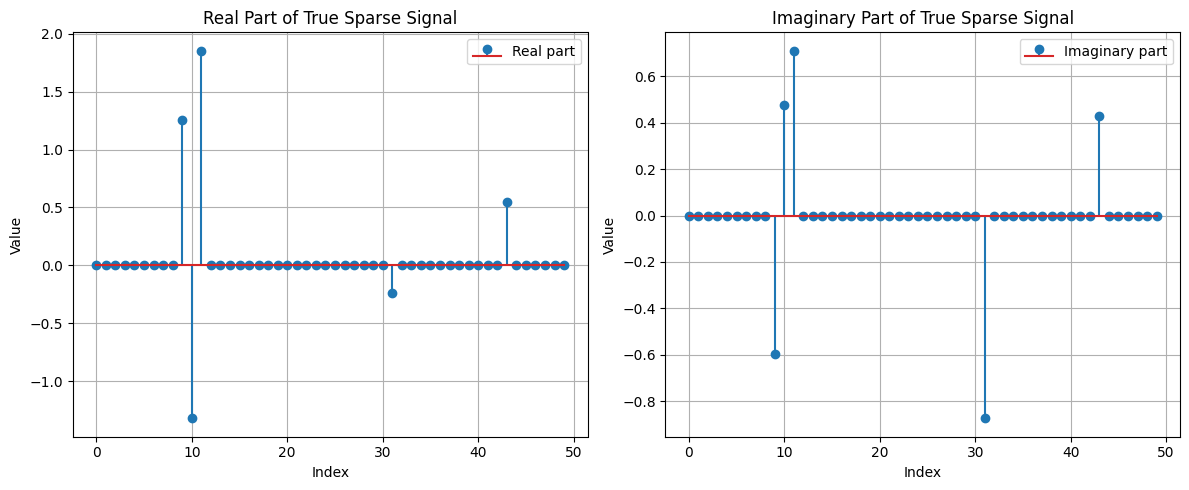

In [6]:
# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot real part of x_true
plt.subplot(1, 2, 1)
plt.stem(range(M), x_true_real, label='Real part')
plt.title('Real Part of True Sparse Signal')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Plot imaginary part of x_true
plt.subplot(1, 2, 2)
plt.stem(range(M), x_true_imag, label='Imaginary part')
plt.title('Imaginary Part of True Sparse Signal')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
model = CmdStanModel(stan_file="latent_complex.stan")
fit = model.sample(data=stan_data, chains=4, iter_warmup=500, iter_sampling=500, max_treedepth=20)

posterior_samples = fit.draws_pd()

# Extract posterior means for x_real and x_imag
mean_x_real = np.array(posterior_samples.filter(like='x_real').mean())
mean_x_imag = np.array(posterior_samples.filter(like='x_imag').mean())

mean_x = mean_x_real + 1j * mean_x_imag

20:07:06 - cmdstanpy - INFO - compiling stan file /Users/namangupta/Desktop/itsstan/complex_latent/latent_complex.stan to exe file /Users/namangupta/Desktop/itsstan/complex_latent/latent_complex
20:07:13 - cmdstanpy - INFO - compiled model executable: /Users/namangupta/Desktop/itsstan/complex_latent/latent_complex
20:07:14 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


















chain 1 |█▋        | 00:08 Iteration:   1 / 1000 [  0%]  (Warmup)





chain 1 |███▎      | 00:08 Iteration: 200 / 1000 [ 20%]  (Warmup)

chain 1 |████▏     | 00:09 Iteration: 300 / 1000 [ 30%]  (Warmup)

chain 1 |█████     | 00:09 Iteration: 400 / 1000 [ 40%]  (Warmup)



chain 1 |██████████| 00:10 Sampling completed                      
chain 2 |██████████| 00:10 Sampling completed                      
chain 3 |██████████| 00:10 Sampling completed                      
chain 4 |██████████| 00:10 Sampling completed                      


20:07:24 - cmdstanpy - INFO - CmdStan done processing.
20:07:24 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 1 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


In [10]:
# Set pandas display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Display the complete summary
print(fit.summary())

# Optional: Reset display options to default after viewing
pd.reset_option('all')

                        Mean          MCSE         StdDev          5%  \
lp__              366.590000      1.322100      17.052100  337.585000   
x_real[1]           0.005318      0.000694       0.016171   -0.011645   
x_real[2]          -0.002406      0.000251       0.009536   -0.020321   
x_real[3]          -0.006842      0.000649       0.016998   -0.043000   
x_real[4]          -0.004272      0.000559       0.015486   -0.033843   
x_real[5]           0.002527      0.000558       0.013801   -0.016557   
x_real[6]           0.002522      0.000507       0.014039   -0.016976   
x_real[7]           0.003194      0.000399       0.011973   -0.011036   
x_real[8]          -0.015776      0.001180       0.027430   -0.075404   
x_real[9]          -0.001775      0.000499       0.015207   -0.029123   
x_real[10]          1.252290      0.001147       0.029769    1.202430   
x_real[11]         -1.316350      0.001206       0.035381   -1.371690   
x_real[12]          1.853280      0.001228       0.

/var/folders/cz/m0yy93q13flbm67m6wwr1ygh0000gn/T/ipykernel_59452/2406006495.py:11: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/cz/m0yy93q13flbm67m6wwr1ygh0000gn/T/ipykernel_59452/2406006495.py:11: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


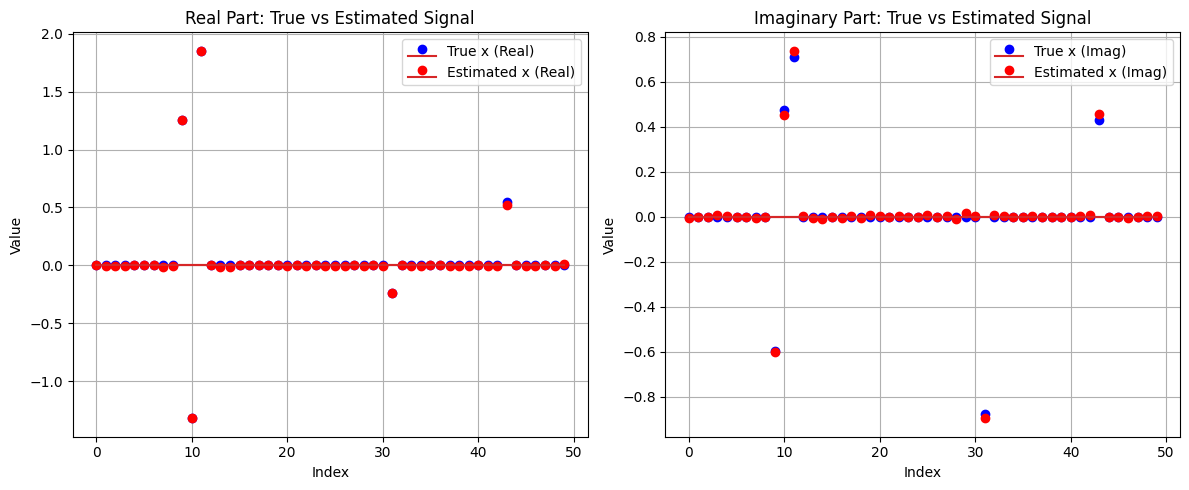

In [16]:
# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# Plot real parts
plt.subplot(1, 2, 1)
plt.stem(range(M), np.real(x_true), label='True x (Real)', linefmt='None', markerfmt='bo')
plt.stem(range(M), np.real(mean_x), label='Estimated x (Real)', linefmt='None', markerfmt='ro')
plt.title('Real Part: True vs Estimated Signal')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Plot imaginary parts
plt.subplot(1, 2, 2)
plt.stem(range(M), np.imag(x_true), label='True x (Imag)', linefmt='None', markerfmt='bo')
plt.stem(range(M), np.imag(mean_x), label='Estimated x (Imag)', linefmt='None', markerfmt='ro')
plt.title('Imaginary Part: True vs Estimated Signal')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# Calculate NMSE for complex values using absolute values squared
norm_diff_squared = np.sum(np.abs(x_true - mean_x)**2)
norm_x_squared = np.sum(np.abs(x_true)**2)
NMSE = norm_diff_squared / norm_x_squared

NMSE

0.000619010945242929

## Generalized

In [3]:
snr_ranges = list(range(0,31,5))

sigma_list = []

for snr in snr_ranges:
    sigma_sq = 10**(-snr/10)
    sigma = sigma_sq**0.5
    sigma_list.append(sigma)

sigma_list

[1.0,
 0.5623413251903491,
 0.31622776601683794,
 0.17782794100389226,
 0.1,
 0.05623413251903491,
 0.03162277660168379]

In [4]:
def get_nmse(N, M, sigma):
    
    H_real = np.random.normal(0, 1, size=(N, M))
    H_imag = np.random.normal(0, 1, size=(N, M))

    # Combine real and imaginary parts of H
    H = H_real + 1j * H_imag

    # Generate a single sparse x (complex-valued)
    x_true_real = np.zeros(M)
    x_true_imag = np.zeros(M)
    non_zero_indices = np.random.choice(M, size=M // 10, replace=False)
    x_true_real[non_zero_indices] = np.random.normal(0, 1, size=M // 10)
    x_true_imag[non_zero_indices] = np.random.normal(0, 1, size=M // 10)
    x_true = x_true_real + 1j * x_true_imag

    # Generate observed Y with Gaussian noise (complex-valued)
    noise_real = np.random.normal(0, sigma, N)
    noise_imag = np.random.normal(0, sigma, N)
    noise = noise_real + 1j * noise_imag
    Y = H @ x_true + noise

    # Decompose H and Y into real and imaginary parts for Stan
    stan_data = {
        "N": N,
        "M": M,
        "Y_real": np.real(Y),
        "Y_imag": np.imag(Y),
        "H_real": H_real,
        "H_imag": H_imag,
        "sigma": sigma,
    }

    model = CmdStanModel(stan_file="latent_complex.stan")
    fit = model.sample(
        data=stan_data, chains=4, 
        iter_warmup=1000, 
        iter_sampling=1000, 
        max_treedepth=20, 
        step_size=0.05, 
        adapt_delta=0.9
        )

    posterior_samples = fit.draws_pd()
    
    mean_x_real = np.array(posterior_samples.filter(like='x_real').mean())
    mean_x_imag = np.array(posterior_samples.filter(like='x_imag').mean())

    mean_x = mean_x_real + 1j * mean_x_imag

    norm_diff_squared = np.sum(np.abs(x_true - mean_x)**2)
    norm_x_squared = np.sum(np.abs(x_true)**2)
    NMSE = norm_diff_squared / norm_x_squared

    return NMSE



In [8]:
NMSE_mean_dict = {}
NMSE_max_dict = {}
NMSE_min_dict = {}

for i in range(len(snr_ranges)):
    nmse_values = []
    K = 10                                  # The no. of iterations u want to run for!
    for iter in range(K):
        nmse_values.append(get_nmse(N=20, M=50, sigma=sigma_list[i]))
    print(f'Done # {snr_ranges[i]}dB')
    NMSE_mean_dict[snr_ranges[i]] = np.mean(nmse_values)
    NMSE_max_dict[snr_ranges[i]] = np.max(nmse_values)
    NMSE_min_dict[snr_ranges[i]] = np.min(nmse_values)

03:08:48 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:09 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:13 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:15 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:17 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:19 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:20 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |████      | 00:23 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:24 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:25 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:27 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:28 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:29 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎  | 00:30 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |█


03:09:30 - cmdstanpy - INFO - CmdStan done processing.
03:09:30 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 33 divergent transitions (3.3%)
	Chain 2 had 69 divergent transitions (6.9%)
	Chain 3 had 15 divergent transitions (1.5%)
	Chain 4 had 29 divergent transitions (2.9%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:09:30 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:11 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:13 Iteration:  100 / 2000 [  5%]  (Warmup)





chain 1 |█▊        | 00:17 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:19 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:21 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:22 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:23 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████      | 00:25 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:27 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:28 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:29 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:30 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:31 Iteration: 1200 / 2000 [ 60%]  (Sampling)




03:10:10 - cmdstanpy - INFO - CmdStan done processing.
03:10:10 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 5 divergent transitions (0.5%)
	Chain 2 had 6 divergent transitions (0.6%)
	Chain 3 had 1 divergent transitions (0.1%)
	Chain 4 had 4 divergent transitions (0.4%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:10:10 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:09 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▎        | 00:13 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:19 Iteration:  200 / 2000 [ 10%]  (Warmup)





chain 1 |██▎       | 00:23 Iteration:  300 / 2000 [ 15%]  (Warmup)





chain 1 |██▋       | 00:25 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▏      | 00:28 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:30 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |████      | 00:32 Iteration:  700 / 2000 [ 35%]  (Warmup)





chain 1 |████▌     | 00:35 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:36 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:38 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:40 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:41 Iteration: 1200 / 2000 [ 60%]  (Sa


03:10:58 - cmdstanpy - INFO - CmdStan done processing.
03:10:59 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 25 divergent transitions (2.5%)
	Chain 2 had 10 divergent transitions (1.0%)
	Chain 3 had 12 divergent transitions (1.2%)
	Chain 4 had 19 divergent transitions (1.9%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:10:59 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:08 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▊        | 00:16 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:18 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:20 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:21 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:22 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:24 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:25 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:26 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:28 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:29 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 00:30 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎  | 00:31 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |█


03:11:45 - cmdstanpy - INFO - CmdStan done processing.
03:11:45 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 12 divergent transitions (1.2%)
	Chain 2 had 13 divergent transitions (1.3%)
	Chain 3 had 13 divergent transitions (1.3%)
	Chain 4 had 6 divergent transitions (0.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:11:45 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status







chain 1 |▉         | 00:11 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:14 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:18 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:20 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:22 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▏      | 00:24 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:25 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:27 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:28 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:30 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:31 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:32 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |██████▊   | 00:34 Iteration: 1200 / 2000 [ 60%]  (Sampl


03:12:28 - cmdstanpy - INFO - CmdStan done processing.
03:12:28 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 2 had 28 divergent transitions (2.8%)
	Chain 3 had 15 divergent transitions (1.5%)
	Chain 4 had 3 divergent transitions (0.3%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:12:28 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:09 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:12 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:17 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:19 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:20 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:22 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:24 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |████      | 00:25 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:26 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:28 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |█████▉    | 00:29 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:31 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:32 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1


03:13:11 - cmdstanpy - INFO - CmdStan done processing.
03:13:11 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 10 divergent transitions (1.0%)
	Chain 2 had 11 divergent transitions (1.1%)
	Chain 3 had 26 divergent transitions (2.6%)
	Chain 4 had 11 divergent transitions (1.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:13:11 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:13 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:15 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:18 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:20 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:21 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:23 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:24 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:26 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:27 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:29 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:30 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:31 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:32 Iteration: 1200 / 2000 [ 60%]  (Sampling


03:13:52 - cmdstanpy - INFO - CmdStan done processing.
03:13:52 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 2 had 5 divergent transitions (0.5%)
	Chain 3 had 17 divergent transitions (1.7%)
	Chain 4 had 2 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:13:52 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:08 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:12 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:16 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:18 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:19 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:21 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:22 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:24 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:25 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:26 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:27 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:28 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▋  | 00:30 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██


03:14:42 - cmdstanpy - INFO - CmdStan done processing.
03:14:42 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 20 divergent transitions (2.0%)
	Chain 2 had 1 divergent transitions (0.1%)
	Chain 3 had 2 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:14:43 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:07 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:14 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:15 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:16 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:18 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:19 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:20 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:22 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:23 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:25 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:26 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:27 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 


03:15:21 - cmdstanpy - INFO - CmdStan done processing.
03:15:21 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.3%)
	Chain 2 had 39 divergent transitions (3.9%)
	Chain 3 had 5 divergent transitions (0.5%)
	Chain 4 had 8 divergent transitions (0.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:15:21 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:08 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:14 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:17 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:20 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:22 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:24 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:26 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:28 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:29 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:31 Iteration:  900 / 2000 [ 45%]  (Warmup)





chain 1 |█████▉    | 00:33 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▎   | 00:36 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:37 Iteration: 1200 / 2000 [ 60%]  (Sampling)






03:16:15 - cmdstanpy - INFO - CmdStan done processing.
03:16:15 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 5 divergent transitions (0.5%)
	Chain 2 had 3 divergent transitions (0.3%)
	Chain 3 had 25 divergent transitions (2.5%)
	Chain 4 had 50 divergent transitions (5.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.



Done # 0dB


03:16:15 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:08 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:10 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:11 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:12 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:13 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:14 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:15 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:15 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:16 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:17 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:17 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:18 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:19 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  


03:16:44 - cmdstanpy - INFO - CmdStan done processing.
03:16:44 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 2 had 3 divergent transitions (0.3%)
	Chain 3 had 5 divergent transitions (0.5%)
	Chain 4 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:16:44 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:08 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:14 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:16 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:17 Iteration:  600 / 2000 [ 30%]  (Warmup)




chain 1 |████      | 00:18 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:19 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:20 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |█████▉    | 00:21 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:22 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:23 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:25 Iteration: 1300 / 2000 [ 65%]  (Sampling)



03:17:16 - cmdstanpy - INFO - CmdStan done processing.
03:17:16 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 4 divergent transitions (0.4%)
	Chain 2 had 6 divergent transitions (0.6%)
	Chain 3 had 25 divergent transitions (2.5%)
	Chain 4 had 20 divergent transitions (2.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:17:16 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:09 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:14 Iteration:  300 / 2000 [ 15%]  (Warmup)





chain 1 |██▋       | 00:15 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:16 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:17 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:18 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:18 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:19 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:20 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:21 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 00:21 Iteration: 1200 / 2000 [ 60%]  (Sampling)


c


03:17:46 - cmdstanpy - INFO - CmdStan done processing.
03:17:46 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 13 divergent transitions (1.3%)
	Chain 2 had 13 divergent transitions (1.3%)
	Chain 3 had 3 divergent transitions (0.3%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:17:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:07 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:09 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:11 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:12 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:13 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:13 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:14 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:15 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:16 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:17 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:17 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:18 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  | 00:18 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |█


03:18:16 - cmdstanpy - INFO - CmdStan done processing.
03:18:16 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 10 divergent transitions (1.0%)
	Chain 2 had 4 divergent transitions (0.4%)
	Chain 3 had 6 divergent transitions (0.6%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:18:16 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:10 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:13 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:14 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:15 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:16 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:16 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:17 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:18 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:19 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▎   | 00:20 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:20 Iteration: 1200 / 2000 [ 60%]  (Sampli


03:18:41 - cmdstanpy - INFO - CmdStan done processing.
03:18:41 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 2 had 4 divergent transitions (0.4%)
	Chain 3 had 9 divergent transitions (0.9%)
	Chain 4 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:18:42 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:09 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:13 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:14 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:15 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:16 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:17 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:18 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:19 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |█████▉    | 00:20 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:20 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |██████▊   | 00:21 Iteration: 1200 / 2000 [ 60%]  (Sampling)



c


03:19:09 - cmdstanpy - INFO - CmdStan done processing.
03:19:09 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 2 divergent transitions (0.2%)
	Chain 2 had 14 divergent transitions (1.4%)
	Chain 3 had 18 divergent transitions (1.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:19:09 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:09 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:13 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:14 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:16 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:17 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:18 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |████▌     | 00:19 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:20 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:20 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:21 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 00:22 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎  | 00:22 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██


03:19:40 - cmdstanpy - INFO - CmdStan done processing.
03:19:40 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 12 divergent transitions (1.2%)
	Chain 2 had 8 divergent transitions (0.8%)
	Chain 3 had 3 divergent transitions (0.3%)
	Chain 4 had 5 divergent transitions (0.5%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:19:40 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:09 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:13 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:14 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:15 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:16 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:17 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:18 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:19 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:20 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |█████▉    | 00:21 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:22 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:23 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 


03:20:11 - cmdstanpy - INFO - CmdStan done processing.
03:20:11 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 3 divergent transitions (0.3%)
	Chain 3 had 13 divergent transitions (1.3%)
	Chain 4 had 2 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:20:11 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:09 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▋       | 00:14 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:15 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:16 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:17 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:18 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:20 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |█████▉    | 00:21 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:22 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |██████▊   | 00:23 Iteration: 1200 / 2000 [ 60%]  (Sampling)



chain 1 |███████▎  | 00:24 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |███████▋  | 00:26 Iteration: 1400 / 2000 [ 70%]  (Sampling)


03:20:45 - cmdstanpy - INFO - CmdStan done processing.
03:20:45 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.3%)
	Chain 2 had 43 divergent transitions (4.3%)
	Chain 3 had 17 divergent transitions (1.7%)
	Chain 4 had 7 divergent transitions (0.7%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:20:45 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:07 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:08 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:10 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:11 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:12 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:13 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:14 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:14 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:15 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:16 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:16 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |██████▊   | 00:17 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  | 00:18 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |██


03:21:13 - cmdstanpy - INFO - CmdStan done processing.
03:21:13 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 8 divergent transitions (0.8%)
	Chain 3 had 2 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.



Done # 5dB


03:21:13 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:09 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:09 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:10 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:11 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:11 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:12 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:13 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:13 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:14 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:14 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:15 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:15 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |██████▊   | 00:16 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 


03:21:35 - cmdstanpy - INFO - CmdStan done processing.
03:21:35 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 2 had 5 divergent transitions (0.5%)
	Chain 3 had 4 divergent transitions (0.4%)
	Chain 4 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:21:36 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:08 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:09 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:09 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:10 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:10 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▏      | 00:11 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:11 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:12 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |████▌     | 00:12 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████     | 00:13 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:13 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 00:14 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 00:14 Iteration: 1200 / 2000 [ 60%]  (Sampling)



c


03:21:55 - cmdstanpy - INFO - CmdStan done processing.
03:21:55 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 1 divergent transitions (0.1%)
	Chain 4 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:21:55 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status














chain 1 |▉         | 00:13 Iteration:    1 / 2000 [  0%]  (Warmup)






chain 1 |█▎        | 00:14 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:15 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:15 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:16 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:16 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:16 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:17 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:17 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:18 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:18 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:18 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 00:18 Iteration: 1200 / 2000 [ 60%]  (Samp


03:22:16 - cmdstanpy - INFO - CmdStan done processing.
03:22:16 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 3 divergent transitions (0.3%)
	Chain 2 had 3 divergent transitions (0.3%)
	Chain 4 had 9 divergent transitions (0.9%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:22:16 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status















chain 1 |▉         | 00:15 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:16 Iteration:  100 / 2000 [  5%]  (Warmup)





chain 1 |█▊        | 00:17 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:18 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:19 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:19 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:20 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:20 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:21 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:21 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:22 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 00:23 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 00:23 Iteration: 1200 / 2000 [ 60%]


03:22:43 - cmdstanpy - INFO - CmdStan done processing.
03:22:43 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 2 divergent transitions (0.2%)
	Chain 3 had 7 divergent transitions (0.7%)
	Chain 4 had 13 divergent transitions (1.3%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:22:44 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:10 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:13 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:14 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:14 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:15 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:15 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:16 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:17 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:17 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:17 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:18 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |██


03:23:07 - cmdstanpy - INFO - CmdStan done processing.
03:23:07 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 5 divergent transitions (0.5%)
	Chain 2 had 2 divergent transitions (0.2%)
	Chain 3 had 3 divergent transitions (0.3%)
	Chain 4 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:23:07 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:13 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:13 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:14 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:14 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:15 Iteration:  700 / 2000 [ 35%]  (Warmup)




chain 1 |████▌     | 00:16 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:16 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:17 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:17 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:18 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:18 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 


03:23:31 - cmdstanpy - INFO - CmdStan done processing.
03:23:31 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 2 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:23:31 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:10 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:12 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:13 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:13 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:14 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:14 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:15 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:15 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:16 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:16 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:17 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:17 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:18 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |


03:23:54 - cmdstanpy - INFO - CmdStan done processing.
03:23:54 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 7 divergent transitions (0.7%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:23:54 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:10 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:13 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:13 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:14 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:15 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:15 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:16 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████     | 00:17 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:17 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:18 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:18 Iteration: 1200 / 2000 [ 60%]  (Sampling)





03:24:17 - cmdstanpy - INFO - CmdStan done processing.
03:24:17 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 3 divergent transitions (0.3%)
	Chain 3 had 8 divergent transitions (0.8%)
	Chain 4 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:24:17 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:11 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:12 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:14 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:14 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:15 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:15 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:16 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:16 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:17 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:17 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:18 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:19 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:19 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 


03:24:42 - cmdstanpy - INFO - CmdStan done processing.
03:24:42 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 7 divergent transitions (0.7%)
	Chain 2 had 39 divergent transitions (3.9%)
	Chain 3 had 5 divergent transitions (0.5%)
	Chain 4 had 3 divergent transitions (0.3%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:24:43 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:10 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:11 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:12 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:13 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:13 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:14 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:14 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:15 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:16 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:16 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:17 Iteration: 1100 / 2000 [ 55%]  (Sampling)





chain 1 |██████▊   | 00:17 Iteration: 1200 / 2000 [ 60%]  (Sampling)



03:25:04 - cmdstanpy - INFO - CmdStan done processing.
03:25:04 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 2 had 2 divergent transitions (0.2%)
	Chain 4 had 5 divergent transitions (0.5%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.



Done # 10dB


03:25:04 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status
























chain 1 |▉         | 00:13 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:14 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:14 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:15 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:15 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:16 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:16 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:16 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:17 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:17 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▊   | 00:18 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  | 00:18 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |████████▏ | 00:18 Iteration: 1500 / 2000 [ 


03:25:24 - cmdstanpy - INFO - CmdStan done processing.
03:25:24 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 4 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:25:24 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▋       | 00:11 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:12 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:12 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████     | 00:13 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:13 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:13 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:13 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎  | 00:14 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:14 Iteration: 1400 / 2000 [ 70%]  (Sampling)



chain 1 |████████▏ | 00:14 Iteration: 1500 / 2000 [ 75%]  (Sampling)




chain 1 |████████▋ | 00:15 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:15 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:15 Iteration: 1800 / 2000 [ 90%]  (Sam


03:25:42 - cmdstanpy - INFO - CmdStan done processing.
03:25:42 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 3 had 1 divergent transitions (0.1%)
	Chain 4 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:25:42 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:10 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:11 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:12 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:12 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:13 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:13 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████      | 00:13 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:14 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:14 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:14 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:14 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 00:15 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chai


03:26:01 - cmdstanpy - INFO - CmdStan done processing.
03:26:01 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 2 divergent transitions (0.2%)
	Chain 2 had 2 divergent transitions (0.2%)
	Chain 3 had 1 divergent transitions (0.1%)
	Chain 4 had 3 divergent transitions (0.3%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:26:01 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








































chain 1 |▉         | 00:14 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:15 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:15 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:15 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:16 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:16 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:16 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:16 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:16 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |██████████| 00:19 Sampling completed                       
chain 2 |██████████| 00:19 Sampling completed                       
chain 3 |██████████| 00:19 Sampling completed                       
chain 4 |██████████| 00:19 Sampling completed   


03:26:20 - cmdstanpy - INFO - CmdStan done processing.
03:26:20 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:26:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






chain 1 |▉         | 00:11 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:12 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:12 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:13 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:13 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:13 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:14 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |████▌     | 00:14 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:14 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:14 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:15 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:15 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  


03:26:40 - cmdstanpy - INFO - CmdStan done processing.
03:26:40 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 4 had 68 divergent transitions (6.8%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:26:40 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status









chain 1 |▉         | 00:12 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:13 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:13 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:14 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:14 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:15 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:15 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:16 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:16 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:17 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:17 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:17 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:18 Iteration: 1300 / 2000 [ 65%]  (Sampli


03:27:01 - cmdstanpy - INFO - CmdStan done processing.
03:27:01 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 1 divergent transitions (0.1%)
	Chain 3 had 2 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:27:01 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





































chain 1 |▉         | 00:14 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:14 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:15 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:15 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:15 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:15 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:16 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:16 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |██████████| 00:18 Sampling completed                       
chain 2 |██████████| 00:18 Sampling completed                       
chain 3 |██████████| 00:18 Sampling completed                       
chain 4 |██████████| 00:18 Sampling completed                       


03:27:19 - cmdstanpy - INFO - CmdStan done processing.
03:27:19 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 11 divergent transitions (1.1%)
	Chain 3 had 2 divergent transitions (0.2%)
	Chain 4 had 3 divergent transitions (0.3%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:27:20 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:11 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |██▋       | 00:11 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:11 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:12 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:12 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:12 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:12 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:13 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:13 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:13 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:13 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▏ | 00:14 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |████████▋ | 00:14 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain


03:27:38 - cmdstanpy - INFO - CmdStan done processing.


03:27:38 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status














chain 1 |▉         | 00:12 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:12 Iteration:  100 / 2000 [  5%]  (Warmup)




chain 1 |█▊        | 00:13 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:13 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:13 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:13 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:14 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:14 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:14 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:14 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:14 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▎   | 00:15 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |██████▊   | 00:15 Iteration: 1200 / 2000 [ 60%]  (Sampl


03:27:56 - cmdstanpy - INFO - CmdStan done processing.


03:27:56 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status














chain 1 |▉         | 00:10 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:11 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:12 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:12 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:13 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:13 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:13 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |█████     | 00:14 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:14 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:14 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 00:15 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  | 00:15 Iteration: 1300 / 2000 [ 65%]  (Sampling)





03:28:16 - cmdstanpy - INFO - CmdStan done processing.
03:28:16 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 2 divergent transitions (0.2%)
	Chain 3 had 1 divergent transitions (0.1%)
	Chain 4 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.



Done # 15dB


03:28:16 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


























































chain 1 |▉         | 00:14 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |██████████| 00:17 Sampling completed                       
chain 2 |██████████| 00:17 Sampling completed                       
chain 3 |██████████| 00:17 Sampling completed                       
chain 4 |██████████| 00:17 Sampling completed                       


03:28:34 - cmdstanpy - INFO - CmdStan done processing.
03:28:34 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 2 divergent transitions (0.2%)
	Chain 3 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:28:34 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






















































chain 1 |▉         | 00:14 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:15 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |██████████| 00:18 Sampling completed                       
chain 2 |██████████| 00:18 Sampling completed                       
chain 3 |██████████| 00:18 Sampling completed                       
chain 4 |██████████| 00:18 Sampling completed                       


03:28:52 - cmdstanpy - INFO - CmdStan done processing.
03:28:52 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 4 divergent transitions (0.4%)
	Chain 2 had 1 divergent transitions (0.1%)
	Chain 3 had 5 divergent transitions (0.5%)
	Chain 4 had 2 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:28:52 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:12 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:12 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:12 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:13 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▏      | 00:13 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:13 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:13 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:13 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:14 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:14 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:14 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 00:14 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain


03:29:09 - cmdstanpy - INFO - CmdStan done processing.
03:29:09 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 1 divergent transitions (0.1%)
	Chain 3 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:29:09 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




















chain 1 |▉         | 00:12 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:12 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:13 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:13 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:13 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:13 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:13 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:13 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:14 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |█████▉    | 00:14 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:14 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:14 Iteration: 1200 / 2000 [ 60%]  


03:29:25 - cmdstanpy - INFO - CmdStan done processing.


03:29:25 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:11 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:11 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:12 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:12 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:12 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:12 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████      | 00:12 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:12 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:13 Iteration:  900 / 2000 [ 45%]  (Warmup)





chain 1 |█████▉    | 00:13 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:13 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:13 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |


03:29:41 - cmdstanpy - INFO - CmdStan done processing.
03:29:41 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 2 had 8 divergent transitions (0.8%)
	Chain 3 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:29:41 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▋  | 00:14 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:14 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |████████▋ | 00:14 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |█████████▌| 00:15 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:15 Iteration: 1900 / 2000 [ 95%]  (Sampling)



















































chain 1 |██████████| 00:21 Sampling completed                       
chain 2 |██████████| 00:21 Sampling completed                       
chain 3 |██████████| 00:21 Sampling completed                       
chain 4 |██████████| 00:21 Sampling completed                       


03:30:03 - cmdstanpy - INFO - CmdStan done processing.
03:30:03 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 4 had 2 divergent transitions (0.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:30:03 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |████▌     | 00:13 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▉    | 00:13 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:13 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 00:14 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:14 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |███████▋  | 00:14 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:14 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:14 Iteration: 1600 / 2000 [ 80%]  (Sampling)




chain 1 |█████████ | 00:15 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:15 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:15 Iteration: 1900 / 2000 [ 95%]  (Sampling)































chain 1 |██████████| 00:17 Sampling completed                       
chain 2 |██████████| 00:17 Samplin


03:30:21 - cmdstanpy - INFO - CmdStan done processing.


03:30:21 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status










chain 1 |▉         | 00:12 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:12 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:13 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:13 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:13 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:13 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:13 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:14 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:14 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:14 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:14 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:14 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 00:15 Iteration: 1200 / 2000 [ 60%]  (Samplin


03:30:39 - cmdstanpy - INFO - CmdStan done processing.
03:30:39 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 4 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:30:39 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:12 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:12 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:12 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:12 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:13 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:13 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:13 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:13 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:13 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:14 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:14 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:14 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎ 


03:30:57 - cmdstanpy - INFO - CmdStan done processing.
03:30:57 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:30:57 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████     | 00:12 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |██████▎   | 00:12 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 00:13 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  | 00:13 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |███████▋  | 00:13 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▏ | 00:13 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |████████▋ | 00:13 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:14 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |█████████▌| 00:14 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:14 Iteration: 1900 / 2000 [ 95%]  (Sampling)













































chain 1 |██████████| 00:17 Sampling completed                       
chain 2 |██████████| 00:17 Sampling completed                       
chain 3 |██████████| 00:17 Sampli


03:31:15 - cmdstanpy - INFO - CmdStan done processing.



Done # 20dB


03:31:15 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:11 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:12 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:12 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:12 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▏      | 00:12 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |████      | 00:12 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:12 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |██████▎   | 00:13 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:13 Iteration: 1300 / 2000 [ 65%]  (Sampling)




chain 1 |████████▏ | 00:13 Iteration: 1500 / 2000 [ 75%]  (Sampling)





chain 1 |█████████▌| 00:13 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:13 Iteration: 1900 / 2000 [ 95%]  (Sampling)





chain 1 |██████████| 00:18 Sampling completed                       



03:31:33 - cmdstanpy - INFO - CmdStan done processing.


03:31:33 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:11 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:11 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▋       | 00:12 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:12 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████▌     | 00:12 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▉    | 00:12 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▊   | 00:12 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▋  | 00:13 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:13 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████▌| 00:13 Iteration: 1800 / 2000 [ 90%]  (Sampling)









chain 1 |██████████| 00:15 Sampling completed                       
chain 2 |██████████| 00:15 Sampling completed
chain 3 |██████████| 0


03:31:48 - cmdstanpy - INFO - CmdStan done processing.


03:31:49 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





















chain 1 |▉         | 00:14 Iteration:    1 / 2000 [  0%]  (Warmup)








chain 1 |█▎        | 00:14 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:14 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:15 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:15 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:15 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |████      | 00:15 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |█████     | 00:15 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |██████▎   | 00:15 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |███████▎  | 00:16 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |████████▏ | 00:16 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |█████████ | 00:16 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:16 Iteration: 1900 / 2000 [ 95%]


03:32:05 - cmdstanpy - INFO - CmdStan done processing.


03:32:06 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:13 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |███▋      | 00:13 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:13 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |████▌     | 00:13 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:13 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:14 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▊   | 00:14 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:14 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▋ | 00:14 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████ | 00:14 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |█████████▌| 00:14 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:15 Iteration: 1900 / 2000 [ 95%]  (Sampling)
































chain 1 |██████████| 00:17 Sampling completed          


03:32:23 - cmdstanpy - INFO - CmdStan done processing.


03:32:23 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




















chain 1 |▉         | 00:14 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▎        | 00:15 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:15 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▎       | 00:15 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:15 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:15 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:15 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████▌     | 00:16 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:16 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:16 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▊   | 00:16 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▋  | 00:16 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |████████▋ | 00:16 Iteration: 1600 / 2000 [ 80%]  (Sampling)



03:32:42 - cmdstanpy - INFO - CmdStan done processing.
03:32:42 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 1 divergent transitions (0.1%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


03:32:42 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








































chain 1 |▉         | 00:16 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▊        | 00:17 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:17 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |███▏      | 00:17 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |████▌     | 00:17 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |██████████| 00:18 Sampling completed                       
chain 2 |██████████| 00:18 Sampling completed                       
chain 3 |██████████| 00:18 Sampling completed                       
chain 4 |██████████| 00:18 Sampling completed                       


03:33:01 - cmdstanpy - INFO - CmdStan done processing.


03:33:01 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▋       | 00:14 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:15 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████▌     | 00:15 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:15 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |█████▉    | 00:15 Iteration: 1001 / 2000 [ 50%]  (Sampling)





chain 1 |██████▊   | 00:15 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |███████▎  | 00:15 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:16 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:16 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |█████████ | 00:16 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:16 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:16 Iteration: 1900 / 2000 [ 95%]  (Sampling)





















chain 1 |██████████| 00:17 Sampling completed


03:33:19 - cmdstanpy - INFO - CmdStan done processing.


03:33:19 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status












chain 1 |▉         | 00:13 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:13 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:14 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:14 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:14 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:14 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:14 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:14 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:14 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:14 Iteration:  900 / 2000 [ 45%]  (Warmup)

chain 1 |███████▎  | 00:15 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |████████▏ | 00:15 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |█████████ | 00:15 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chai


03:33:35 - cmdstanpy - INFO - CmdStan done processing.


03:33:36 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status












chain 1 |▉         | 00:15 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:15 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:15 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:16 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:16 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:16 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████▌     | 00:16 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████▉    | 00:16 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▊   | 00:16 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▋  | 00:16 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▋ | 00:17 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |█████████▌| 00:17 Iteration: 1800 / 2000 [ 90%]  (Sampling)



chain 1 |██████████| 00:17 Sampling completed                       


03:33:53 - cmdstanpy - INFO - CmdStan done processing.


03:33:53 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status






















chain 1 |▉         | 00:14 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:14 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:14 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▋       | 00:14 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▋      | 00:15 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████▌     | 00:15 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▉    | 00:15 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:15 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████████| 00:17 Sampling completed                       
chain 2 |██████████| 00:17 Sampling completed                       
chain 3 |██████████| 00:17 Sampling completed                       
chain 4 |██████████| 00:17 Sampling completed                       


03:34:11 - cmdstanpy - INFO - CmdStan done processing.
03:34:11 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 3 had 2 divergent transitions (0.2%)
	Chain 4 had 3 divergent transitions (0.3%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.



Done # 25dB


03:34:11 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:11 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:11 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:12 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:12 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:12 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:12 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:12 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▋ | 00:12 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████▌| 00:13 Iteration: 1800 / 2000 [ 90%]  (Sampling)





chain 1 |██████████| 00:13 Sampling completed                       
chain 2 |██████████| 00:13 Sampling completed                       
chain 3 |██████████| 00:13 Sampling completed                       


03:34:25 - cmdstanpy - INFO - CmdStan done processing.


03:34:25 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:11 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:11 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:11 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▋       | 00:11 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▋      | 00:11 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████▌     | 00:12 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████▍    | 00:12 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |██████▎   | 00:12 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |███████▎  | 00:12 Iteration: 1300 / 2000 [ 65%]  (Sampling)




chain 1 |████████▏ | 00:12 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |█████████ | 00:12 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:13 Iteration: 1900 / 2000 [ 95%]  (Sampling)











chain 1 |██████████| 00:14 Sampling completed                       
chai


03:34:39 - cmdstanpy - INFO - CmdStan done processing.


03:34:39 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███████▎  | 00:13 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |█████████ | 00:13 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:14 Iteration: 1900 / 2000 [ 95%]  (Sampling)






























chain 1 |██████████| 00:17 Sampling completed                       
chain 2 |██████████| 00:17 Sampling completed                       
chain 3 |██████████| 00:17 Sampling completed                       
chain 4 |██████████| 00:17 Sampling completed                       


03:34:56 - cmdstanpy - INFO - CmdStan done processing.


03:34:57 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


























chain 1 |▉         | 00:13 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:13 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |██▎       | 00:13 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |███▏      | 00:13 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |██████████| 00:14 Sampling completed                       
chain 2 |██████████| 00:14 Sampling completed                       
chain 3 |██████████| 00:14 Sampling completed                       
chain 4 |██████████| 00:14 Sampling completed                       


03:35:12 - cmdstanpy - INFO - CmdStan done processing.


03:35:12 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status













chain 1 |███████▎  | 00:13 Iteration: 1300 / 2000 [ 65%]  (Sampling)

chain 1 |█████████ | 00:14 Iteration: 1700 / 2000 [ 85%]  (Sampling)

chain 1 |██████████| 00:14 Iteration: 1900 / 2000 [ 95%]  (Sampling)

















chain 1 |██████████| 00:15 Sampling completed                       
chain 2 |██████████| 00:15 Sampling completed                       
chain 3 |██████████| 00:15 Sampling completed                       
chain 4 |██████████| 00:15 Sampling completed                       


03:35:27 - cmdstanpy - INFO - CmdStan done processing.


03:35:27 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:15 Iteration: 1900 / 2000 [ 95%]  (Sampling)
































chain 1 |██████████| 00:18 Sampling completed                       
chain 2 |██████████| 00:18 Sampling completed                       
chain 3 |██████████| 00:18 Sampling completed                       
chain 4 |██████████| 00:18 Sampling completed                       


03:35:46 - cmdstanpy - INFO - CmdStan done processing.


03:35:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status
















chain 1 |▉         | 00:11 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▊        | 00:11 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▋       | 00:12 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████▌     | 00:12 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████▉    | 00:12 Iteration: 1001 / 2000 [ 50%]  (Sampling)
chain 1 |██████▊   | 00:12 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▋  | 00:13 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▋ | 00:13 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████▌| 00:13 Iteration: 1800 / 2000 [ 90%]  (Sampling)



chain 1 |██████████| 00:16 Sampling completed                       
chain 2 |██████████| 00:16 Sampling completed                       
chain 3 |██████████| 00:16 Sampling completed                       
chain 4 |██████████| 00:16 Sampling completed                    


03:36:03 - cmdstanpy - INFO - CmdStan done processing.


03:36:03 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status

































chain 1 |▉         | 00:15 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |██████████| 00:16 Sampling completed                       
chain 2 |██████████| 00:16 Sampling completed                       
chain 3 |██████████| 00:16 Sampling completed                       
chain 4 |██████████| 00:16 Sampling completed                       


03:36:20 - cmdstanpy - INFO - CmdStan done processing.
03:36:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status






chain 1 |▉         | 00:12 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:12 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |███▏      | 00:12 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |████      | 00:13 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |█████     | 00:13 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |██████▎   | 00:13 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:13 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |█████████ | 00:13 Iteration: 1700 / 2000 [ 85%]  (Sampling)



chain 1 |██████████| 00:14 Iteration: 1900 / 2000 [ 95%]  (Sampling)













chain 1 |██████████| 00:15 Sampling completed                       
chain 2 |██████████| 00:15 Sampling completed                       
chain 3 |██████████| 00:15 Sampling completed                       
chain 4 |██████████| 00:15 Sampling completed                       


03:36:35 - cmdstanpy - INFO - CmdStan done processing.


03:36:35 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


















chain 1 |▉         | 00:12 Iteration:    1 / 2000 [  0%]  (Warmup)






chain 1 |██▎       | 00:12 Iteration:  300 / 2000 [ 15%]  (Warmup)
chain 1 |███▏      | 00:12 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |████      | 00:13 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |█████     | 00:13 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |██████▎   | 00:13 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |███████▎  | 00:13 Iteration: 1300 / 2000 [ 65%]  (Sampling)
chain 1 |████████▏ | 00:13 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████ | 00:13 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:13 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:14 Sampling completed                       
chain 2 |██████████| 00:14 Sampling completed                       
chain 3 |██████████| 00:14 Sampling completed                       


03:36:50 - cmdstanpy - INFO - CmdStan done processing.



Done # 30dB


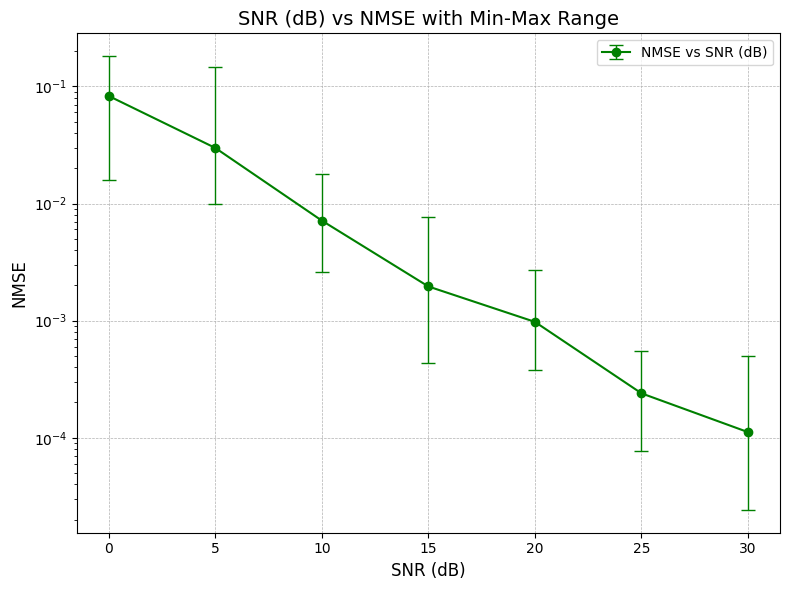

In [9]:
# Convert dictionary data to lists for plotting
snr = list(NMSE_mean_dict.keys())
nmse_mean = list(NMSE_mean_dict.values())
nmse_max = list(NMSE_max_dict.values())
nmse_min = list(NMSE_min_dict.values())

# Calculate the error bars from mean to min/max
yerr_low = np.array(nmse_mean) - np.array(nmse_min)
yerr_high = np.array(nmse_max) - np.array(nmse_mean)

# Plotting
plt.figure(figsize=(8, 6))
plt.errorbar(snr, nmse_mean, yerr=[yerr_low, yerr_high], marker='o', linestyle='-', color='g',
            label='NMSE vs SNR (dB)', capsize=5, elinewidth=1, capthick=1)
plt.xlabel('SNR (dB)', fontsize=12)
plt.ylabel('NMSE', fontsize=12)
plt.title('SNR (dB) vs NMSE with Min-Max Range', fontsize=14)

# Set y-axis to logarithmic scale
plt.yscale('log')

# Modify grid to only show major grid lines
plt.grid(True, which="major", linestyle='--', linewidth=0.5)  # Removed "both" to show only major grid

plt.legend()
plt.tight_layout()
plt.show()